## Assignment 04

In [3]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Load Dataset
dataset=pd.read_csv('abalone.csv')
dataset.head()
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
#Tukey Method

# Import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   
# List of Outliers
Outliers_to_drop = detect_outliers(dataset.drop('Rings',axis=1),0,list(dataset.drop('Rings',axis=1)))
dataset.drop('Rings',axis=1).loc[Outliers_to_drop]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
148,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125
149,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015
237,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040
238,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030
...,...,...,...,...,...,...,...
3148,0.710,0.530,0.195,1.8745,0.6755,0.4065,0.6855
3149,0.700,0.540,0.215,1.9780,0.6675,0.3125,0.7100
3151,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.7250
3928,0.725,0.550,0.220,2.0495,0.7735,0.4405,0.6550


In [6]:
#Create New Dataset without Outliers
good_data = dataset.drop(dataset.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4024 non-null   float64
 1   Diameter        4024 non-null   float64
 2   Height          4024 non-null   float64
 3   Whole weight    4024 non-null   float64
 4   Shucked weight  4024 non-null   float64
 5   Viscera weight  4024 non-null   float64
 6   Shell weight    4024 non-null   float64
 7   Rings           4024 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 251.6 KB


In [7]:
#Create Standard Model

#Define x and y variable
x = good_data.drop('Rings',axis=1).to_numpy()
y = good_data['Rings'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
alpha=0.5

In [8]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)

pipe_lasso= Pipeline([('scl', StandardScaler()),
                     ('clf', Lasso(alpha=alpha,tol=1,random_state=100))])
pipeline.insert(1,pipe_lasso)

pipe_ridge= Pipeline([('scl', StandardScaler()),
                     ('clf', Ridge(alpha=alpha,tol=1,random_state=100))])
pipeline.insert(2,pipe_ridge)

pipe_elas= Pipeline([('scl', StandardScaler()),
                     ('clf', ElasticNet(alpha=alpha,tol=1,random_state=100))])
pipeline.insert(3,pipe_elas)

# Set grid search params 

modelpara =[]

param_gridlm = {'clf__fit_intercept':[True,False],
             'clf__normalize':[True,False], 
             'clf__copy_X':[True, False]}
modelpara.insert(0,param_gridlm)

param_gridlasso = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(1,param_gridlasso)

param_gridridge = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(2,param_gridridge)

param_gridelas = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(3,param_gridelas)

Model Evaluation - RMSE
LinearRegression 1.48
Lasso 1.61
Ridge 1.48
ElasticNet 1.60




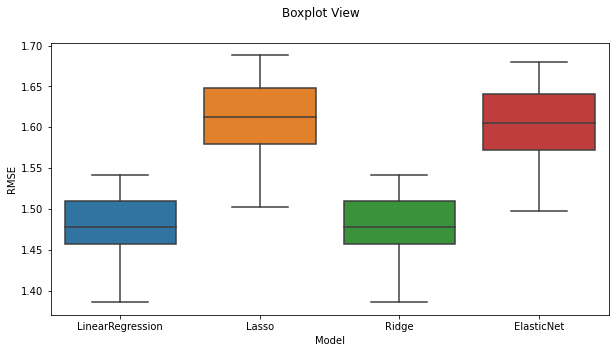

In [9]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LinearRegression',pipe_lm))
models.append(('Lasso',pipe_lasso))
models.append(('Ridge',pipe_ridge))
models.append(('ElasticNet',pipe_elas))
  
#Model Evaluation
results =[]
names=[]
scoring ='neg_root_mean_squared_error'
print('Model Evaluation - RMSE')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name,np.sqrt(-cv_results.mean())))
print('\n')

#Boxplot View
fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [10]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='neg_root_mean_squared_error')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
   
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Test data accuracy of model with best params    
    print('\nIntercept: {:.2f}'.format(float(gs_clf.best_estimator_.named_steps['clf'].intercept_)))
    print('\nModel coefficients: ')   
    for name, score in zip(list(good_data.drop('Rings',axis=1)),
                           gs_clf.best_estimator_.named_steps['clf'].coef_):
         print(name, round(score,2)) 
    
    #Print MSE and RMSE
    print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
    print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) 

In [11]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LinearRegression()

Best Parameters: {'clf__copy_X': True, 'clf__fit_intercept': True, 'clf__normalize': True}

Intercept: 9.96

Model coefficients: 
Length -0.44
Diameter 0.9
Height 0.94
Whole weight 3.96
Shucked weight -4.07
Viscera weight -1.08
Shell weight 1.43
Mean Absolute Error: 1.58
Mean Squared Error: 4.76
Root Mean Squared Error: 2.18

Optimized Model

Model Name: Lasso(alpha=0.5, random_state=100, tol=1)

Best Parameters: {'clf__alpha': 0.1}

Intercept: 9.96

Model coefficients: 
Length 1.13
Diameter 0.14
Height 0.54
Whole weight -0.04
Shucked weight -0.63
Viscera weight 0.07
Shell weight 0.69
Mean Absolute Error: 1.75
Mean Squared Error: 5.93
Root Mean Squared Error: 2.44

Optimized Model

Model Name: Ridge(alpha=0.5, random_state=100, tol=1)

Best Parameters: {'clf__alpha': 1}

Intercept: 9.96

Model coefficients: 
Length -0.43
Diameter 0.88
Height 0.94
Whole weight 3.81
Shucked weight -4.0
Viscera weight -1.05
Shell weight 1.48
Mean Absolute 

In [12]:
!jupyter nbconvert  2204a-4.ipynb --to html

[NbConvertApp] Converting notebook 2204a-4.ipynb to html
[NbConvertApp] Writing 624932 bytes to 2204a-4.html
